# Word Embedding - Oded Ben Chetrit


In this project I used word vectors trained on a corpus of lyrics of songs from MetroLyrics http://github.com/omriallouche/ydata_deep_learning_2021/blob/master/data/metrolyrics.parquet.

### Train word vectors
I trained word vectors using the Skipgram Word2vec algorithm and the gensim package.

I used 300 as the dimension of the word vectors. 

In [ ]:
# imports:
import pandas as pd
import numpy as np
import gensim, logging
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
# Obtain data:
data = pd.read_parquet('metrolyrics.parquet', engine='auto')

In [9]:
# Preprocessing functions:
def split_lyrics_to_sent(lyrics):
    """ This function gets an input of lyrics and outputs a list of unique sentences in of the lyrics """
    return list(set(re.split('\n|,|;', lyrics)))

def preprocessing(sent):
    """ This function gets an input of sentence, process it and outputs a list of words """
    sent = BeautifulSoup(sent).get_text() 
    
    # Remove non-letters        
    sent = re.sub("[^a-zA-Z]", " ", sent) 
    
    # Convert to lower case, split into individual words
    words = sent.lower().split()                             
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))                  
    words = [w for w in words if not w in stop_words]   
    
    return words 

In [10]:
# store all senteces in a list and each sentence as a list of words.
sentences = []
for i in tqdm(range(len(data))):
    pre_sentences = split_lyrics_to_sent(data.iloc[i]['lyrics'])
    for sent in pre_sentences: 
        processed_sent = preprocessing(sent)
        if len( processed_sent) >= 2:
            sentences += [processed_sent]

  1%|▍                                                                             | 316/49976 [00:05<13:51, 59.70it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
  2%|█▍                                                                            | 928/49976 [00:20<17:29, 46.75it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "/" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
  3%|██▌                                                                          | 1640/49976 [00:37<17:50, 45.14it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: ". . ." looks like a filename, not markup. You should probably open this file and pa

 70%|█████████████████████████████████████████████████████                       | 34930/49976 [12:32<06:31, 38.39it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "............." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
 76%|█████████████████████████████████████████████████████████▊                  | 38007/49976 [13:34<04:24, 45.23it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "............................." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
 77%|██████████████████████████████████████████████████████████▋                 | 38554/49976 [13:45<04:10, 45.65it/s]C:\Users\odedb\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "......." looks like a filename, not markup. Y

In [326]:
# Initialize and train word2vec model: 
# *min_count acts as the rare words removal
model = Word2Vec(sentences, min_count = 1, vector_size = 300) 

In [ ]:
# save the model: 
word2vec_model_file = 'word2vec.model'
model.save(word2vec_model_file)

### Review most similar words
After training the word2vec models we can analyze the most similar words for a few interesting words in the text. 

In [328]:
word = 'man'
vector = model.wv[word]  # get numpy vector of a word
sims = model.wv.most_similar(word, topn=10)  # get other similar words
sims

[('woman', 0.6710080504417419),
 ('guy', 0.6208667159080505),
 ('boy', 0.5967287421226501),
 ('brother', 0.5931611657142639),
 ('men', 0.5920445919036865),
 ('soldier', 0.5788384675979614),
 ('lady', 0.5731309652328491),
 ('dude', 0.5619574785232544),
 ('wife', 0.5563691258430481),
 ('kid', 0.5556125640869141)]

In [329]:
word = 'good'
vector = model.wv[word]  # get numpy vector of a word
sims = model.wv.most_similar(word, topn=10)  # get other similar words
sims

[('tough', 0.6709010601043701),
 ('fine', 0.6546562910079956),
 ('bad', 0.6497252583503723),
 ('sure', 0.6017459034919739),
 ('nice', 0.595479428768158),
 ('rough', 0.5794839859008789),
 ('fun', 0.5753704905509949),
 ('lucky', 0.5725195407867432),
 ('impazzisco', 0.5703966617584229),
 ('lovin', 0.566329836845398)]

In [353]:
word = 'music'
vector = model.wv[word]  # get numpy vector of a word
sims = model.wv.most_similar(word, topn=10)  # get other similar words
sims

[('radio', 0.6803069710731506),
 ('songs', 0.675468921661377),
 ('tune', 0.6508832573890686),
 ('rhythm', 0.6441221237182617),
 ('song', 0.6441169381141663),
 ('jazz', 0.6260191798210144),
 ('melody', 0.6178542375564575),
 ('sounds', 0.6086684465408325),
 ('plays', 0.5851755142211914),
 ('jukebox', 0.5763245224952698)]

In [350]:
word = 'tomato'
vector = model.wv[word]  # get numpy vector of a word
sims = model.wv.most_similar(word, topn=10)  # get other similar words
sims

[('garlic', 0.9353829622268677),
 ('sodden', 0.9281578063964844),
 ('premium', 0.9259875416755676),
 ('bins', 0.924847424030304),
 ('cess', 0.9234695434570312),
 ('arsenic', 0.9227761030197144),
 ('grub', 0.9219933152198792),
 ('pastels', 0.921524703502655),
 ('zazigga', 0.9213875532150269),
 ('malkkaji', 0.9193834066390991)]

In [349]:
word = 'green'
vector = model.wv[word]  # get numpy vector of a word
sims = model.wv.most_similar(word, topn=10)  # get other similar words
sims

[('yellow', 0.7589839696884155),
 ('purple', 0.7478525042533875),
 ('blue', 0.7257858514785767),
 ('pink', 0.7057106494903564),
 ('orange', 0.6948954463005066),
 ('grass', 0.6867517828941345),
 ('red', 0.6864237189292908),
 ('white', 0.6830347776412964),
 ('brown', 0.6827245950698853),
 ('colored', 0.6726545691490173)]

### Word Vectors Algebra
Let's try some algebraic games on the word vectors (e.g. man - woman + king = queen ):

In [334]:
model.wv.most_similar(positive=['man', 'king'], negative=['woman'], topn=1)

[('queens', 0.586066484451294)]

In [354]:
model.wv.most_similar(positive=['father', 'man'], negative=['mother'], topn=1)

[('woman', 0.5643231272697449)]

In [369]:
model.wv.most_similar(positive=['big', 'sea'], negative=['small'], topn=1)

[('river', 0.5353491902351379)]

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, I'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon contains a polarity score for words in range -1 (negative) to 1 (positive) 

- Build a regressor for the sentiment of a word given its word vector in range -1 to 1. 
- Split the data to a train and test sets
- evaluate the model performance on both sets.

I used my trained model from the previous section to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. 

The words with the highest positive and negative sentiment are reviewed in the following cells

In [67]:
# Upload Sentiment Data: 
df = pd.read_csv("SemEval2015-English-Twitter-Lexicon.txt", sep="\t", header=None, names=["rate","sent"])
df

,rate,sent
0,0.984,loves
1,0.984,#inspirational
2,0.969,amazing
3,0.969,#peaceful
4,0.953,#greatness
...,...,...
1510,-0.969,abuse
1511,-0.969,#failure
1512,-0.982,kill
1513,-0.984,bitches


### Preprocess data: 

In [68]:
# Removing hashtags:
N = len(df)
vectors = []
for i in range(N):
    if df.loc[i,'sent'][0] == '#':
        df.loc[i,'sent'] = df.loc[i,'sent'][1:]

# Create vectors to words in vocab, words that do not appear in vocab, ommit from data: 
for i in range(N):
    try: 
        vectors.append(model.wv[df.sent[i]])
    except: 
        df.drop([i],inplace = True)

vectors = np.array(vectors)

### Split data to train and test: 

In [84]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
new_N = len(df)
indices = np.arange(new_N)
X_train, X_test, Y_train, Y_test, indices_train, indices_test, = train_test_split(vectors,
                                                                df['rate'],
                                                                indices,
                                                                shuffle=True,
                                                                test_size=0.2, 
                                                                random_state=15)

### Train XGboost regressor on train set and predict on test set: 

In [85]:
import xgboost
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1)
clf.fit(X_train, Y_train)

In [91]:
Y_hat = clf.predict(X_test)
test_set = df.iloc[indices_test]
test_set['preds'] = Y_hat
test_set = test_set.sort_values('preds', ascending = False)

<ipython-input-91-cd2486b1649e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['preds'] = Y_hat


### Display words with highest and lowest sentiments: 

In [99]:
# Words with the highest positive sentiment:
test_set.head()

,rate,sent,preds
49,0.828,phenomenal,0.921003
17,0.875,love,0.875100
32,0.857,gorgeous,0.872319
82,0.781,relaxing,0.811129
68,0.813,inspiring,0.749014


In [100]:
# Words with the highest negative sentiment:
test_set.tail()

,rate,sent,preds
1425,-0.797,useless,-0.844216
1174,-0.469,selfish,-0.874855
1481,-0.891,horrendous,-0.888855
1488,-0.906,disturbing,-0.921599
1457,-0.844,disgusted,-0.937006


### Visualize Word Vectors
In this section, I'll plot words on a 2D grid based on their inner similarity. 
I'll use the tSNE transformation to reduce dimensions from 300 to 2.

Work methodology: 
- Keeping only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. 


In [233]:
# Define bag of words counter dictionaries:
bow = {}
bow_by_genre = {}
N = len(data)
for i in tqdm(range(N)):
    lyrics = data.iloc[i]['lyrics']
    genre = data.iloc[i]['genre']
    
    # preprocess lyrics into words: 
    words = preprocessing(lyrics)
    
    # Store words in bow and bow by genre: 
    for word in words: 
        if word not in bow.keys():
            bow[word] = 0
        bow[word] += 1
        
        if genre not in bow_by_genre.keys():
            bow_by_genre[genre] = {}
        if word not in bow_by_genre[genre].keys():
            bow_by_genre[genre][word] = 0
        bow_by_genre[genre][word] += 1          

100%|███████████████████████████████████████████████████████████████████████████| 49976/49976 [00:54<00:00, 913.16it/s]


In [209]:
# Keep only the 3,000 most frequent words (after removing stopwords)
top_words_in_corpus = {k: v for k, v in sorted(bow.items(), key=lambda item: item[1], reverse=True)[:3000]}   

In [210]:
# Compute for each word its relative abundance in each of the genres
def compute_relative_abundance(word):
    relative_abundance_dict = {}
    for genre in bow_by_genre.keys():
        if word in bow_by_genre[genre].keys():
            relative_abundance_dict[genre] = bow_by_genre[genre][word]
        else:
            relative_abundance_dict[genre] = 0
    tot_appearance = np.sum(list(relative_abundance_dict.values()))
    relative_abundance_dict.update((_, y / tot_appearance) for _, y in relative_abundance_dict.items())
    return relative_abundance_dict

relative_abundance_per_word = {}
for word in top_words_in_corpus.keys():
    relative_abundance_per_word[word] = compute_relative_abundance(word)

In [253]:
# Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus
# (the background distribution)

# tot number of words per genre: 
number_of_words_per_genre = {}
for genre in bow_by_genre.keys():
    number_of_words_per_genre[genre] = np.sum(list(bow_by_genre[genre].values()))

# tot number of words: 
number_of_words = np.sum(list(number_of_words_per_genre.values()))

# proportion of words in entire corpus:
proportion_of_words = {}
for word, value in top_words_in_corpus.items():
    proportion_of_words[word] = value / number_of_words
    
# proportion of words by genre: 
proportion_of_words_by_genre = {}
for genre in bow_by_genre.keys():
    proportion_of_words_by_genre[genre]= {}
    for word, value in bow_by_genre[genre].items():
        proportion_of_words_by_genre[genre][word] = value / number_of_words_per_genre[genre]

# ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus:
ratio = {}
for genre in bow_by_genre.keys():
    ratio[genre]= {}
    for word, value in proportion_of_words_by_genre[genre].items():
        try:
            ratio[genre][word] = value / proportion_of_words[word]
        except:
            pass

In [257]:
# Pick the top 50 words for each genre. These words give good indication for that genre.
# Join the words from all genres into a single list of top significant words.
top_50 = {}
for genre in bow_by_genre.keys():
    top_50[genre] = {k: v for k, v in sorted(ratio[genre].items(), key=lambda item: item[1], reverse=True)[:50]}   

In [284]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Compute tSNE transformation to 2D for all words, based on their word vectors: 
    
# Reduces the dimensionality from 300 to 50 dimensions with PCA
reduc = PCA(n_components=50).fit_transform(vectors)

# Finds t-SNE coordinates for 2 dimensions
np.set_printoptions(suppress=True)

Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

In [312]:
def tsnescatterplot(model, top_50):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors per genre
    """
    
    arrays = np.empty((0, 300), dtype='f')
    word_labels = []
    # color for each genre: 
    colors = {'Pop' :'pink', 'Hip-Hop': 'blue', 'Rock' : 'red', 'Country' : 'green', 'Metal':'black'}
    color_list = []
    
    # adds the vector for each of the genres:
    for genre in bow_by_genre.keys():
        for word in top_50[genre]:
            wrd_vector = model.wv.__getitem__([word])
            word_labels.append(word)
            color_list.append(colors[genre])
            arrays = np.append(arrays, wrd_vector, axis=0)

        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(20, 20)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.title('t-SNE visualization')
    

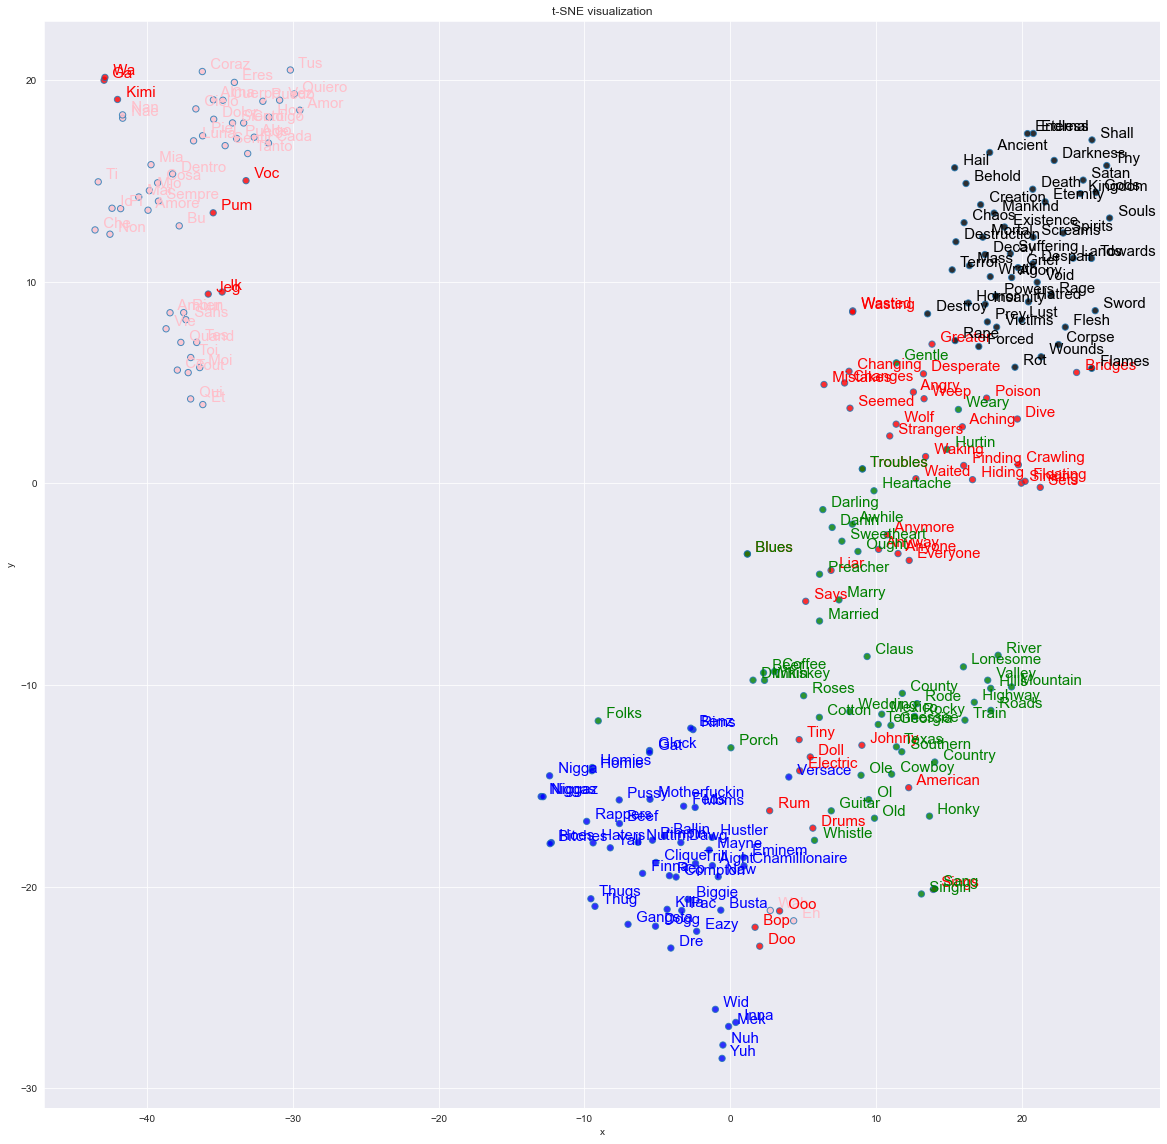

In [313]:
tsnescatterplot(model, top_50)

Legend - 'Pop' :'pink', 'Hip-Hop': 'blue', 'Rock' : 'red', 'Country' : 'green', 'Metal':'black'

- We can notice a significant distinctions between the top words of each genre. 
- Number of points to mark:

 1. In the Pop genre (pink) there are a lot of spanish songs. and this is the reason why the Pop words group are located in a distinct area. 

 2. english lyrics are densed together, but still there is a distinct clusters between genre. 

 3. country (green) and rock (red) that can be similar in the music type are sharing some undistinc area. It make sense since soft rock music can be similar to later country music. 

 4. Metal music which is known to be dark in its kind, uses also dark words such as 'Distroy', 'Rage' and 'Darkness'. 